In [1]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("X_train.csv")

In [ ]:
answers = pd.read_csv("y_train.csv")

In [ ]:
answers.head(5)

In [ ]:
data = (pd.merge(data ,answers, on = "Unnamed: 0"))

In [ ]:
data['age'] = (data['age'] - data['age'].mean(axis = 0))/data['age'].std(axis = 0)

In [ ]:
data['age'].mean(), data['age'].std()

In [ ]:
labels = data['axis_id']

In [ ]:
data = data.drop( ["Unnamed: 0","axis_id"], axis = 1)

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

In [ ]:
from biosppy.signals import ecg

In [ ]:
signal = data.values[60,2:5002]
out = ecg.ecg(signal=signal, sampling_rate=500.)
plt.plot(signal)
#plt.plot(out[1], 'green')
plt.plot(out[2], signal[out[2]], 'ro')

In [14]:
labels[23]

0

In [15]:
from detect import QRSDetectorOffline

qrs peaks indices
[  70  255  426  633  860 1061 1224 1354 1516 1793 1915 2315 2703 3091
 3495 3903 4316 4723]
noise peaks indices
[1652 2196 2451 2537 2615 2851 2944 3236 3341 3630 3766 3824 4067 4205
 4442 4521 4862 4918]


FileNotFoundError: [Errno 2] No such file or directory: 'plots/QRS_offline_detector_plot_2019_03_03_21_56_23.png'

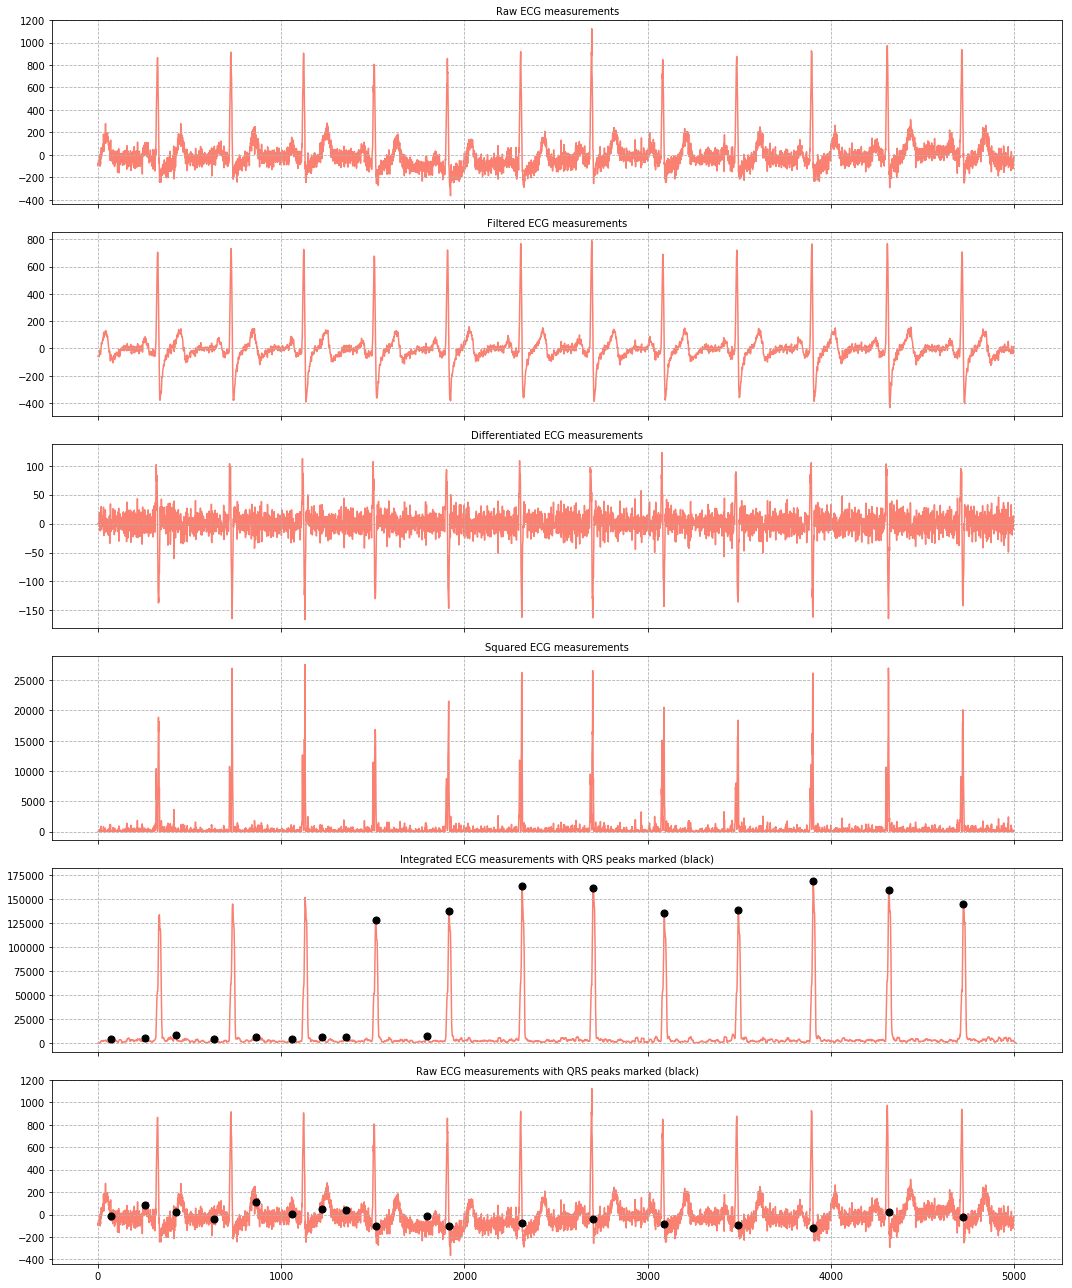

In [16]:
detector  = QRSDetectorOffline(ecg_data_raw = signal, signal_frequency=500, plot_data=True, show_plot=True)

In [17]:
len(signal.shape)

1

In [21]:
import pywt as pw

In [22]:
from wfdb import processing

In [25]:
xqrs = processing.XQRS(sig=signal, fs=500)
xqrs.detect()

Learning initial signal parameters...
Failed to find 8 beats during learning.
Initializing using default parameters
Running QRS detection...
QRS detection complete.


C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

In [27]:
xqrs.qrs_inds

array([ 116,  324,  725, 1122, 1507, 1907, 2306, 2694, 3082, 3486, 3895,
       4307, 4715])

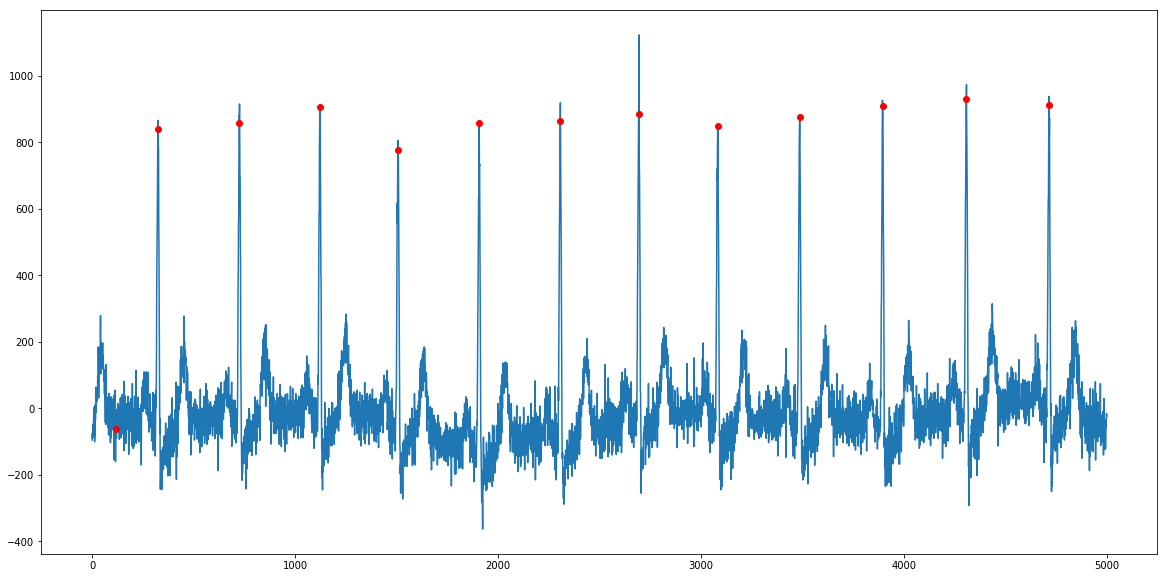

In [28]:
plt.plot(signal)
plt.plot(xqrs.qrs_inds, signal[xqrs.qrs_inds], 'ro')

In [29]:
gqrs = processing.GQRS(sig=signal, fs=500)
gqrs.detect(ver)

AttributeError: module 'wfdb.processing' has no attribute 'GQRS'